In [1]:
import face_recognition
import cv2
import os
import math
import json
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats
from pathlib import Path
from PIL import Image, ImageDraw
from torchvision import transforms
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from implementation.Preprocessor.FaceExtractor import FaceExtractor, dict_landmarks, list_landmarks, draw_landmarks

# Print the location of each facial feature in this image
facial_features = [
    'chin',
    'left_eyebrow',
    'right_eyebrow',
    'nose_bridge',
    'nose_tip',
    'left_eye',
    'right_eye',
    'top_lip',
    'bottom_lip'
    ]

In [2]:
with open('/home/max/landmarks.json') as f:
    landmarks = json.load(f)

In [8]:
landmarks_array = np.array(list(landmarks.values()))
landmarks_X = landmarks_array[:,::2]
landmarks_Y = landmarks_array[:,1::2]
N, D = landmarks_array.shape

# Evaluation of landmarks

<Figure size 720x720 with 0 Axes>

(0.0, 1.0, -1.0, 0.0)

(0.0, 1.0, -1.0, 0.0)

Text(0.5,1,'2d histogram of facial landmarks')

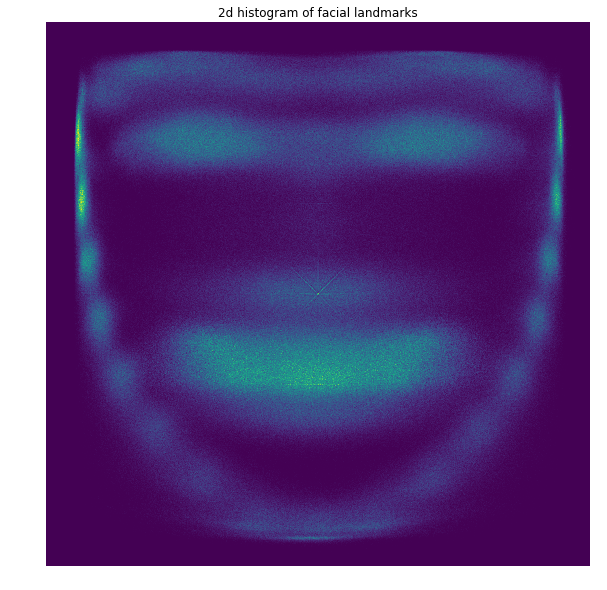

In [10]:
plt.figure(figsize=(10,10))
n, x_bins, y_bins, patches = plt.hist2d(landmarks_X.reshape(-1),  # x coordinates
                                        -landmarks_Y.reshape(-1), # y coordinates inverted
                                        bins=1000, range=[[0,1],[-1,0]])
plt.axis('off')
plt.axis('equal')
plt.title('2d histogram of facial landmarks')
plt.show()

# 5 Landmarks

In [21]:
eye_left_X = np.mean(landmarks_X[:,36:42], axis=1)
eye_left_Y = np.mean(landmarks_Y[:,36:42], axis=1)
eye_right_X = np.mean(landmarks_X[:,42:48], axis=1)
eye_right_Y = np.mean(landmarks_Y[:,42:48], axis=1)
nose_X = np.mean(landmarks_X[:,31:36], axis=1)
nose_Y = np.mean(landmarks_Y[:,31:36], axis=1)
mouth_left_X = landmarks_X[:,48]
mouth_left_Y = landmarks_Y[:,48]
mouth_right_X = landmarks_X[:,60]
mouth_right_Y = landmarks_Y[:,60]

landmarks_5 = np.vstack((eye_left_X, eye_left_Y, eye_right_X, eye_right_Y, nose_X, nose_Y, mouth_left_X, mouth_left_Y, mouth_right_X, mouth_right_Y)).T

eye_left_X = np.mean(eye_left_X)
eye_left_Y = np.mean(eye_left_Y)
eye_right_X = np.mean(eye_right_X)
eye_right_Y = np.mean(eye_right_Y)
nose_X = np.mean(nose_X)
nose_Y = np.mean(nose_Y)
mouth_left_X = np.mean(mouth_left_X)
mouth_left_Y = np.mean(mouth_left_Y)
mouth_right_X = np.mean(mouth_right_X)
mouth_right_Y = np.mean(mouth_right_Y)

<Figure size 720x720 with 0 Axes>

(0.0, 1.0, -1.0, 0.0)

(0.0, 1.0, -1.0, 0.0)

Text(0.5,1,'2d histogram of facial landmarks + 5 landmarks')

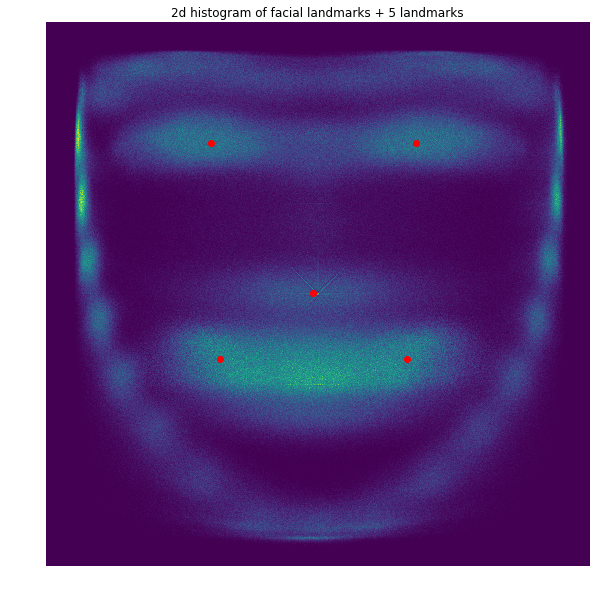

In [19]:
plt.figure(figsize=(10,10))
n, x_bins, y_bins, patches = plt.hist2d(landmarks_X.reshape(-1),  # x coordinates
                                        -landmarks_Y.reshape(-1), # y coordinates inverted
                                        bins=1000, range=[[0,1],[-1,0]])
plt.scatter([eye_left_X, eye_right_X, nose_X, mouth_left_X, mouth_right_X],
            [-eye_left_Y, -eye_right_Y, -nose_Y, -mouth_left_Y, -mouth_right_Y], c='r')
plt.axis('off')
plt.axis('equal')
plt.title('2d histogram of facial landmarks + 5 landmarks')
plt.show()

<Figure size 720x720 with 0 Axes>

Text(0.5,1,'Histogram - x coordinate left eye landmark')

Text(0.5,1,'Histogram - y coordinate left eye landmark')

<Figure size 720x720 with 0 Axes>

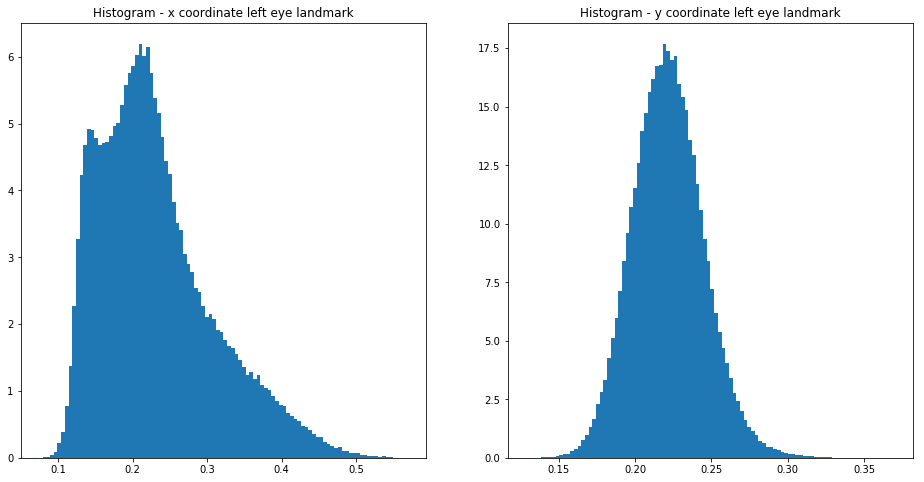

In [5]:
N_bins = 100
dim = 72

# Fit distribution
x = np.linspace(0,1,num=N_bins)
mean, std = scipy.stats.norm.fit(landmarks_array[:,dim])
#pdf_fitted = scipy.stats.norm.pdf(x, mean, std)# * x.shape

plt.figure(figsize=(10,10))

#plt.plot(x, pdf_fitted, label='Norm')
fig, ax = plt.subplots(1,2, figsize=(16,8))
n, bins, patches = ax[0].hist(landmarks_array[:,dim], bins=N_bins, density=True)
ax[0].set_title('Histogram - x coordinate left eye landmark')
n, bins, patches = ax[1].hist(landmarks_array[:,dim+1], bins=N_bins, density=True)
ax[1].set_title('Histogram - y coordinate left eye landmark')

plt.show()

# Generation of landmarks

In [6]:
mean = np.mean(landmarks_array, axis=0)
cov = np.cov(landmarks_array, rowvar=0)

In [7]:
image_path = Path('/tmp/gray.jpg')
image = Image.open(image_path)

for i in range(100):
    pass
    # Generate landmarks in all formats
    random_landmarks = np.random.multivariate_normal(mean, cov)
    random_landmarks_unscaled = (random_landmarks) * image.size[0]
    random_landmarks_list = list(zip(random_landmarks_unscaled[::2], random_landmarks_unscaled[1::2]))
    random_landmarks_dict = dict_landmarks(random_landmarks_list)
    # Drawings
    random_img = draw_landmarks(image, random_landmarks_dict)
    random_img.save('/tmp/random_faces/' + str(i) + '.jpg')

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/gray.jpg'

# Mean face

In [ ]:
mean_landmarks_unscaled = (mean) * image.size[0]
mean_landmarks_list = list(zip(mean_landmarks_unscaled[::2], mean_landmarks_unscaled[1::2]))
mean_landmarks_dict = dict_landmarks(mean_landmarks_list)
draw_landmarks(image, mean_landmarks_dict)

# Generation of landmarks (5 points)

In [23]:
mean = np.mean(landmarks_5, axis=0)
cov = np.cov(landmarks_5, rowvar=0)

In [27]:
np.random.multivariate_normal(mean, cov, size=(5))

array([[0.26494979, 0.24169489, 0.60670145, 0.24169489, 0.39263986,
        0.438379  , 0.27983406, 0.63115076, 0.5322221 , 0.64865919],
       [0.18560501, 0.17128202, 0.58429327, 0.17128202, 0.331997  ,
        0.50387505, 0.2163081 , 0.64585205, 0.54881396, 0.66163514],
       [0.34850367, 0.22881278, 0.70639217, 0.22881278, 0.54671936,
        0.50095557, 0.41980068, 0.64068379, 0.66364825, 0.64111462],
       [0.21088657, 0.20974112, 0.58661814, 0.20974112, 0.36344716,
        0.50182956, 0.24461138, 0.63420951, 0.57553316, 0.6225934 ],
       [0.30185965, 0.22967815, 0.65367078, 0.22967815, 0.4485311 ,
        0.52283358, 0.31232605, 0.62596616, 0.61707208, 0.62366372]])

In [26]:
mean

array([0.30398259, 0.22154795, 0.68190153, 0.22154795, 0.49111343,
       0.49881944, 0.32136906, 0.61958142, 0.66557939, 0.61939952])